In [67]:
import logging
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from keras.utils import to_categorical

In [68]:
# Function to compute and save statistics
def save_model_statistics(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 100 + "\n")
        f.write(f"{stage}:\n\n")
        for i in range(2):
            mean = np.mean(filters[:, :, 0, i])
            variance = np.var(filters[:, :, 0, i])
            f.write(f"Kernel {i + 1} Weights:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

            mean = np.mean(biases[i])
            variance = np.var(biases[i])
            f.write(f"Kernel {i + 1} Biases:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

# Function to save weights
def save_model_weights(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 10 + "\n")
        f.write(f"\n{stage}:\n")
        for i in range(2):
            x = (filters[:, :, 0, i])
            y = (biases[i])
            f.write(f"Kernel {i + 1}\n")
            f.write(f"\n{x}\n")
            f.write(f"\n{y}\n")

# Function to save kernel comparison images
def save_kernel_comparison_images(file_path, filters_before, filters_after):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    for i in range(2):
        ax = axes[i]
        kernel = np.concatenate([filters_before[:, :, 0, i], filters_after[:, :, 0, i]], axis=1)
        ax.imshow(kernel, cmap='gray')
        #plt.set_title(f'Kernel {i + 1}')
        for (x, z), val in np.ndenumerate(kernel):
            ax.text(z, x, f'{val:.4f}', ha='center', va='center', color='red', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()


In [69]:
class WeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1]
        print(f"\nEpoch {epoch + 1}:")
        print(f"Weights:\n{weights}")
        print(f"Bias:\n{bias}")
        print(f"Loss: {logs['loss']}")
        save_model_weights("6_weights.txt", weights, bias, epoch)


In [70]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

x_train = np.concatenate([x_full[y_full == 0][:], x_full[y_full == 1][:]])
y_train = np.concatenate([y_full[y_full == 0][:], y_full[y_full == 1][:]])
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

x_test = np.concatenate([x_test_full[y_test_full == 0][:], x_test_full[y_test_full == 1][:]])
y_test = np.concatenate([y_test_full[y_test_full == 0][:], y_test_full[y_test_full == 1][:]])
indices_test = np.arange(x_test.shape[0])
np.random.shuffle(indices_test)
x_test = x_test[indices_test]
y_test = y_test[indices_test]

x_full=x_train
y_full=y_train
x_test_full=x_test
y_test_full=y_test

# # Convert the labels from 1 and 2 to 0 and 1
# y_full = np.where(y_full == 2, 1, 0)
# y_test_full = np.where(y_test_full == 2, 1, 0)

# # Now apply one-hot encoding
# y_full = to_categorical(y_full, num_classes=2)
# y_test_full = to_categorical(y_test_full, num_classes=2)

x_full = x_full.reshape(-1, 28, 28, 1)
x_test_full = x_test_full.reshape(-1, 28, 28, 1)
y_full = to_categorical(y_full, num_classes=2)
y_test_full=to_categorical(y_test_full, num_classes=2)

In [71]:
print(x_full.shape)
print(x_full[0].shape)
print(y_full.shape)
print(y_full[0])

(12665, 28, 28, 1)
(28, 28, 1)
(12665, 2)
[1. 0.]


In [72]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [73]:
weights_init=(model.layers[0].get_weights()[0])
bias_init=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_init.shape}")
print(f"Bias:\n{bias_init.shape}")
print(f"Weights:\n{weights_init}")
print(f"Bias:\n{bias_init}")


Weights:
(3, 3, 1, 2)
Bias:
(2,)
Weights:
[[[[ 0.1679242   0.34337816]]

  [[-0.25253952 -0.35257065]]

  [[ 0.30639532 -0.46564862]]]


 [[[ 0.26594618  0.10433987]]

  [[-0.21731848  0.23974511]]

  [[-0.4339344   0.11935011]]]


 [[[ 0.08983651 -0.11865708]]

  [[-0.02191311 -0.2492151 ]]

  [[ 0.18742421  0.3828142 ]]]]
Bias:
[0. 0.]


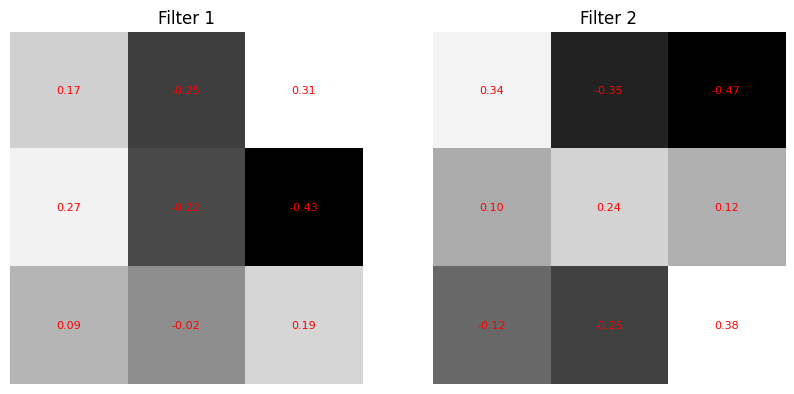

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.imshow(weights_init[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

ax = axes[1]
ax.imshow(weights_init[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [75]:
for i in range(2):
    mean = np.mean(weights_init[:, :, 0, i])
    variance = np.var(weights_init[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_init[i])
    variance = np.var(bias_init[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('0_1_weights_stats.txt', weights_init, bias_init, 'Before Training')
save_model_weights('0_1_weights.txt', weights_init, bias_init, 'Before Training')

Conv Layer 1 Weights:
Mean: 0.01020232867449522
Variance: 0.05942760035395622
Conv Layer 1 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: 0.00039288733387365937
Variance: 0.08493169397115707
Conv Layer 2 Biases:
Mean: 0.0
Variance: 0.0
------------------------------


In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_full, y_full, epochs=10, callbacks=[WeightsCallback()])

Epoch 1/10
370/396 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.9602 - loss: 1.2146
Epoch 1:
Weights:
[[[[ 0.16585408  0.32710105]]

  [[-0.23013213 -0.3685322 ]]

  [[ 0.31852004 -0.47537833]]]


 [[[ 0.27186376  0.08518227]]

  [[-0.1825138   0.21214738]]

  [[-0.41192856  0.08461423]]]


 [[[ 0.10827532 -0.13302955]]

  [[ 0.00574539 -0.2783487 ]]

  [[ 0.18852334  0.34161958]]]]
Bias:
[-0.01714807 -0.02489698]
Loss: 0.30047184228897095
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.9622 - loss: 1.1531
Epoch 2/10
366/396 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9984 - loss: 0.0246
Epoch 2:
Weights:
[[[[ 0.16788344  0.3226091 ]]

  [[-0.22418076 -0.36941442]]

  [[ 0.3144317  -0.4791125 ]]]


 [[[ 0.27142835  0.08410381]]

  [[-0.17285429  0.2074689 ]]

  [[-0.41103926  0.07748403]]]


 [[[ 0.11611576 -0.13090007]]

  [[ 0.01239404 -0.2836827 ]]

  [[ 0.18177591  0.33475098]]]]
Bias:
[-0.02573257 -0.03304296]
Loss: 0.02509167045354843
396/396 ━━━━━━━━━━━━━━━━━━━

In [77]:
weights_final=(model.layers[0].get_weights()[0])
bias_final=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_final}")
print(f"Bias:\n{bias_final}")

Weights:
[[[[ 0.15261973  0.29753017]]

  [[-0.23539965 -0.38746893]]

  [[ 0.27989691 -0.5043122 ]]]


 [[[ 0.25747624  0.06602521]]

  [[-0.16062497  0.18401669]]

  [[-0.42986664  0.06583315]]]


 [[[ 0.12778035 -0.13530494]]

  [[ 0.02321903 -0.29939213]]

  [[ 0.11284758  0.3136993 ]]]]
Bias:
[-0.10835532 -0.08114368]


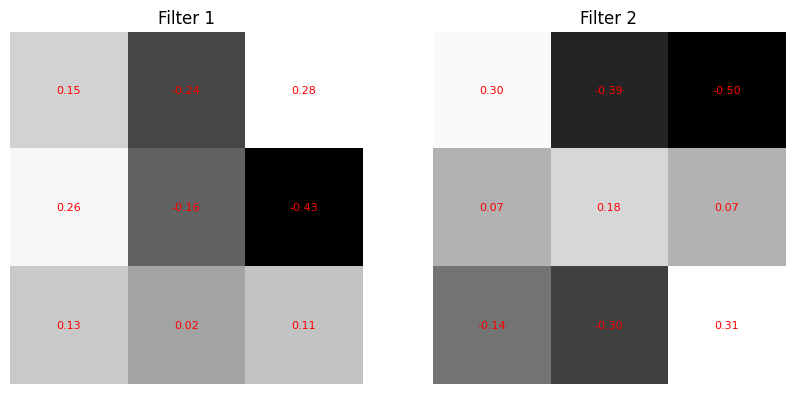

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.imshow(weights_final[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
ax = axes[1]
ax.imshow(weights_final[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [79]:
for i in range(2):
    mean = np.mean(weights_final[:, :, 0, i])
    variance = np.var(weights_final[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_final[i])
    variance = np.var(bias_final[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('0_1_weights_stats.txt', weights_final, bias_final, 'After Training')
save_model_weights('0_1_weights.txt', weights_final, bias_final, 'After Training')
save_kernel_comparison_images('0_1_image.png', weights_init, weights_final)

Conv Layer 1 Weights:
Mean: 0.014216514304280281
Variance: 0.05130114406347275
Conv Layer 1 Biases:
Mean: -0.1083553209900856
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: -0.04437485709786415
Variance: 0.08046343177556992
Conv Layer 2 Biases:
Mean: -0.08114368468523026
Variance: 0.0
------------------------------


In [80]:
test_loss, test_acc = model.evaluate(x_test_full, y_test_full)
print(f'Test accuracy: {test_acc}')


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9987 - loss: 0.0185 
Test accuracy: 0.9990543723106384


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


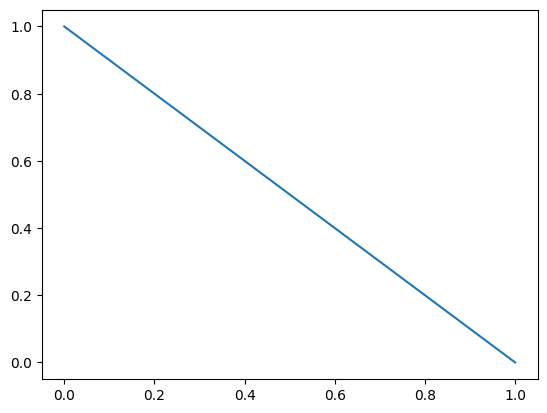

In [81]:
predictions = model.predict(x_test_full)
plt.plot((predictions[0])) 


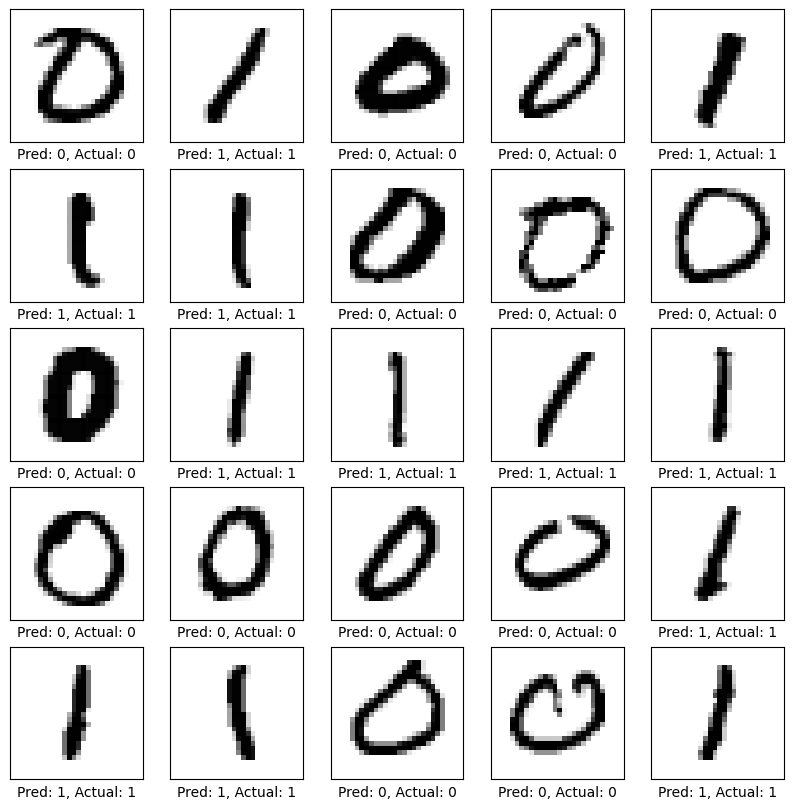

In [82]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_full[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test_full[i])}")
plt.show()


In [83]:

from scipy.signal import convolve2d

image = x_test_full[1]
image = image[:, :, 0]

kernel = weights_final[:,:,0,1]

print(kernel)
print(image.shape)

[[ 0.29753017 -0.38746893 -0.5043122 ]
 [ 0.06602521  0.18401669  0.06583315]
 [-0.13530494 -0.29939213  0.3136993 ]]
(28, 28)


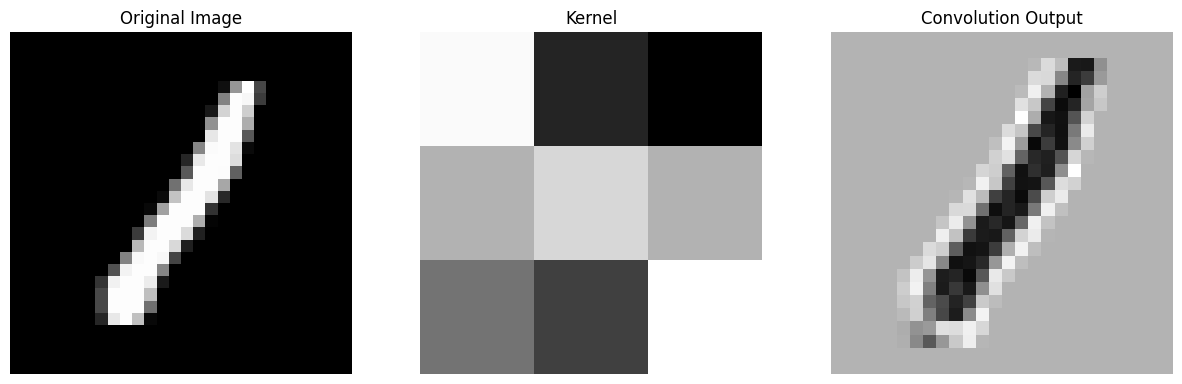

In [84]:


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()


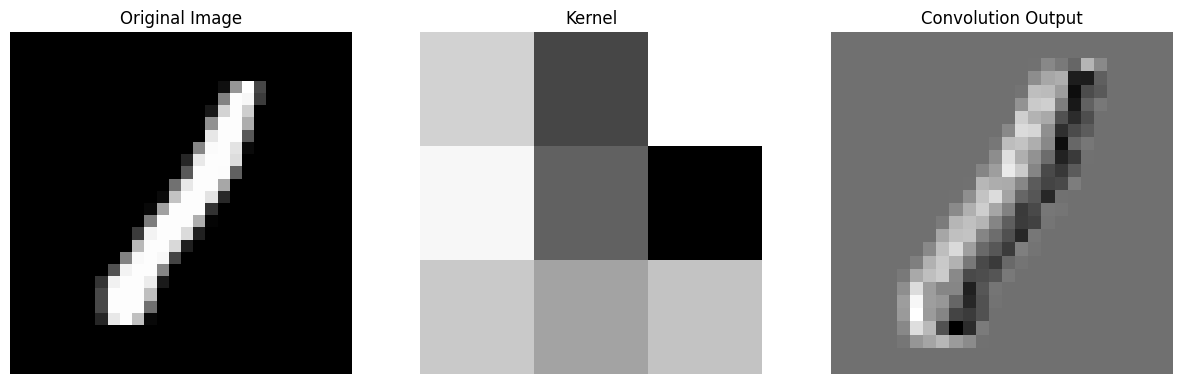

In [85]:
kernel = weights_final[:,:,0,0]


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()
